In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df_txp = pd.read_csv("../data/transaction_product.csv", parse_dates=["Date"])
df_txp.head()

,TransactionID,Date,CustomerID,ProductID,StoreID,Quantity,Discount,PaymentMethod,UnitPrice,CostPrice,ProductName,Category,TotalPrice,TotalPriceWithDiscount,TotalCost,Revenue,RevenuePerProduct
0,T00001,2024-06-18,C160,P014,S003,1,0.10,Bank Transfer,1342.75,797.94,Add Clothing,Fashion,1342.75,1208.475,797.94,410.535,410.535
1,T00002,2023-11-02,C171,P030,S004,3,0.15,Bank Transfer,29.24,15.28,National Watches,Fashion,87.72,74.562,45.84,28.722,9.574
2,T00003,2024-03-28,C142,P002,S002,2,0.15,Mobile Money,818.76,527.62,Audience Television,Electronics,1637.52,1391.892,1055.24,336.652,168.326
3,T00004,2024-06-15,C174,P050,S002,5,0.10,Mobile Money,1044.64,775.07,Maybe Footwear,Fashion,5223.20,4700.880,3875.35,825.530,165.106
4,T00005,2024-08-29,C141,P036,S001,3,0.10,Credit Card,1501.46,1167.73,New Watches,Fashion,4504.38,4053.942,3503.19,550.752,183.584


In [8]:
df_highest_revenue = df_txp[df_txp["ProductID"].isin(['P023','P045'])]
df_highest_revenue.head()

,TransactionID,Date,CustomerID,ProductID,StoreID,Quantity,Discount,PaymentMethod,UnitPrice,CostPrice,ProductName,Category,TotalPrice,TotalPriceWithDiscount,TotalCost,Revenue,RevenuePerProduct
9,T00010,2024-06-16,C038,P045,S001,1,0.05,Mobile Money,1879.08,1004.56,Set Dairy,Groceries,1879.08,1785.126,1004.56,780.566,780.5660
22,T00023,2024-08-02,C107,P023,S001,2,0.15,Mobile Money,1878.47,1014.91,And Footwear,Fashion,3756.94,3193.399,2029.82,1163.579,581.7895
44,T00045,2024-09-30,C093,P045,S004,2,0.15,Credit Card,1879.08,1004.56,Set Dairy,Groceries,3758.16,3194.436,2009.12,1185.316,592.6580
46,T00047,2025-05-06,C112,P045,S005,3,0.10,Credit Card,1879.08,1004.56,Set Dairy,Groceries,5637.24,5073.516,3013.68,2059.836,686.6120
99,T00100,2025-07-07,C071,P023,S004,3,0.10,Cash,1878.47,1014.91,And Footwear,Fashion,5635.41,5071.869,3044.73,2027.139,675.7130


Grouping by week will show:
* Less distortion
* weekly consumption cycles
* Ideal for "forecasting"

In [10]:
df_highest_revenue["Week"] = df_highest_revenue["Date"].dt.to_period("W")

weekly_revenue = (
    df_highest_revenue.groupby(["ProductID", "Week"])["Revenue"]
    .sum()
    .reset_index()
)

weekly_revenue

C:\Users\crist\AppData\Local\Temp\ipykernel_16776\2859811598.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_highest_revenue["Week"] = df_highest_revenue["Date"].dt.to_period("W")


,ProductID,Week,Revenue
0,P023,2023-09-18/2023-09-24,6344.939
1,P023,2023-09-25/2023-10-01,1351.426
2,P023,2023-10-02/2023-10-08,2327.158
3,P023,2023-10-09/2023-10-15,4054.278
4,P023,2023-10-30/2023-11-05,2890.699
...,...,...,...
130,P045,2025-07-28/2025-08-03,3433.060
131,P045,2025-08-11/2025-08-17,592.658
132,P045,2025-08-18/2025-08-24,5088.146
133,P045,2025-08-25/2025-08-31,874.520


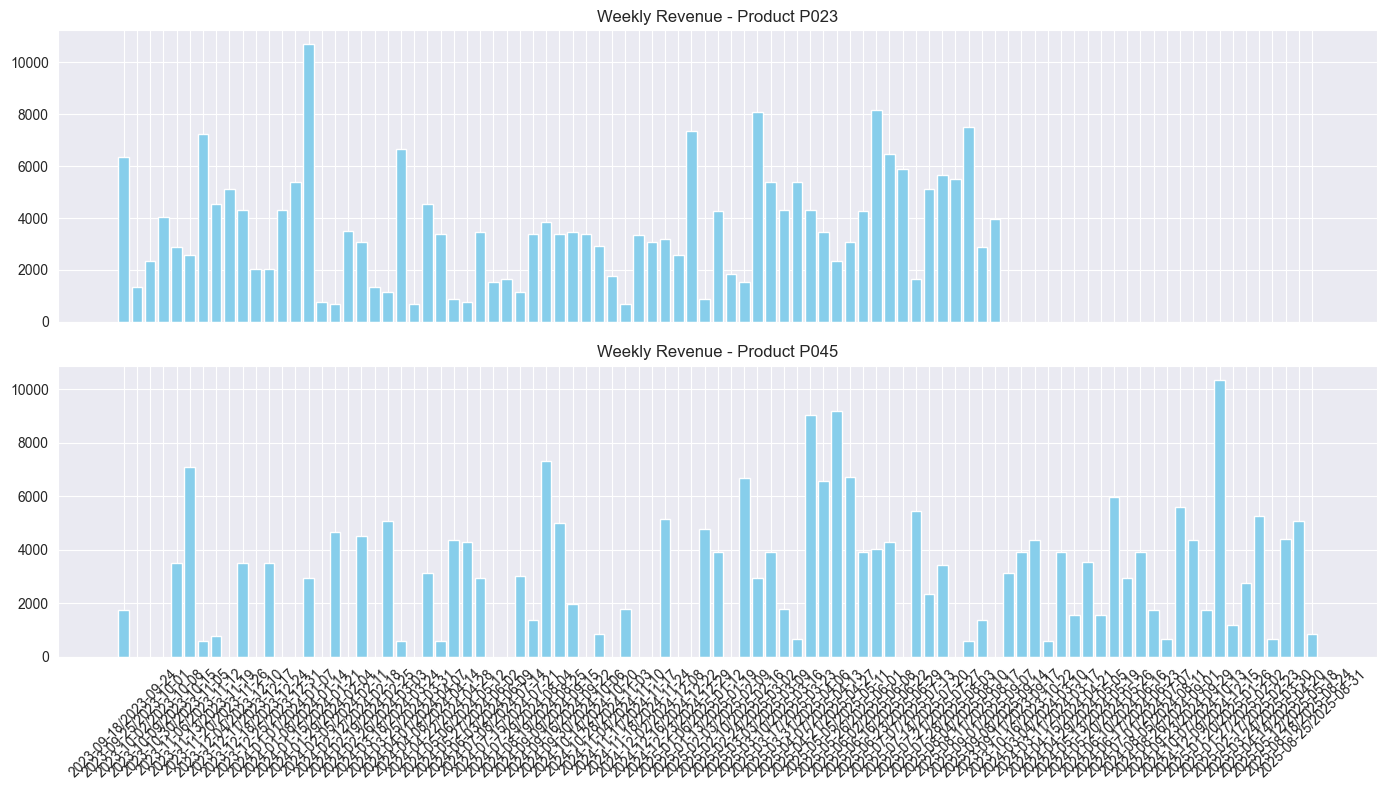

In [14]:
fig, axes = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

products = weekly_revenue["ProductID"].unique()

for i, product in enumerate(products):
    subset = weekly_revenue[weekly_revenue["ProductID"] == product]
    axes[i].bar(subset["Week"].astype(str), subset["Revenue"], color="skyblue")
    axes[i].set_title(f"Weekly Revenue - Product {product}")
    axes[i].tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()

Grpah with 10 top week with more revenue

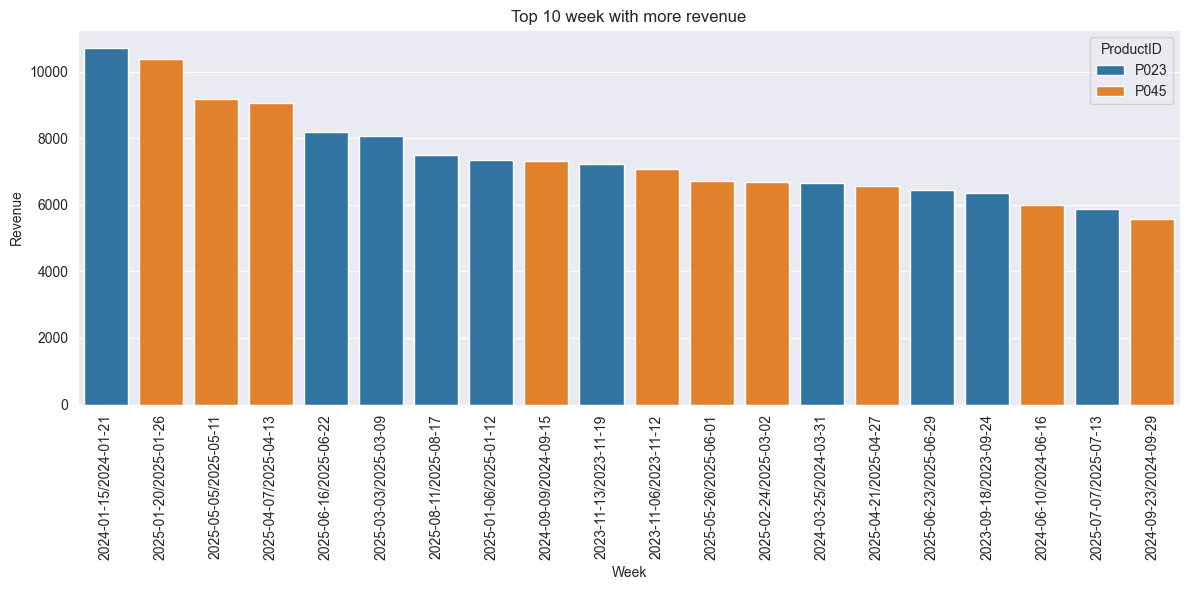

In [18]:
top_weeks = (
    weekly_revenue.sort_values("Revenue", ascending=False)
    .groupby("ProductID")
    .head(10)
)

plt.figure(figsize=(12,6))
sns.barplot(data=top_weeks, x="Week", y="Revenue", hue="ProductID")
plt.xticks(rotation=90)
plt.title("Top 10 week with more revenue")
plt.tight_layout()
plt.show()